In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from functools import reduce

In [9]:
lambda_list=['1', '5e-1', '1e-1', '5e-2', '1e-2', '5e-3', '1e-3']

In [10]:
def get_test_loss(solver):
    data_frames = []
    for l2 in lambda_list:
        log = 'matlab-log/'+"sol_"+ solver +'_gpu_1_l2_'+l2+'_d_20_t_200_eta_0.3_cgt_20_time_1.csv'
        df = pd.read_csv(log)
        df = df[["iter", "test_loss"]]
        df = df.rename(columns = {'test_loss': l2})
        data_frames.append(df)
    return reduce(lambda left,right: pd.merge(left,right,on=['iter'], how='outer'), data_frames)
def get_obj(solver):
    data_frames = []
    for l2 in lambda_list:
        log = 'matlab-log/'+"sol_"+ solver +'_gpu_1_l2_'+l2+'_d_20_t_200_eta_0.3_cgt_20_time_1.csv'
        df = pd.read_csv(log)
        df = df[["iter", "obj"]]
        df = df.rename(columns = {"obj": l2})
        data_frames.append(df)
    return reduce(lambda left,right: pd.merge(left,right,on=['iter'], how='outer'), data_frames)

In [11]:
# Take min of each lambda
data0 = get_test_loss('0').drop(columns=['iter']).min().to_frame(name="Gauss")
data1 = get_test_loss('1').drop(columns=['iter']).min().to_frame(name="ALS_CG")
# Merge on row index, which is lambda
data = pd.merge(data0, data1, left_index=True, right_index=True)
data = data.reset_index()
data = data.rename(columns = {"index": "lambda"})
data.head()

,lambda,Gauss,ALS_CG
0,1,1.419405,1.409558
1,5e-1,1.114896,1.105344
2,1e-1,0.957547,0.937935
3,5e-2,0.929740,0.921922
4,1e-2,0.922251,0.964899


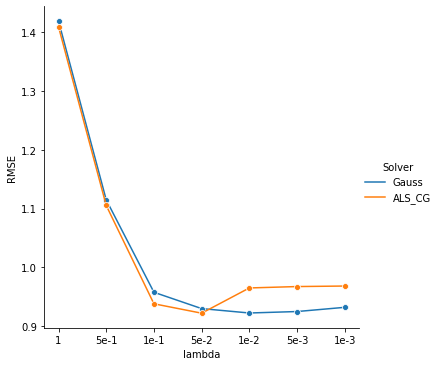

In [12]:
data = data.melt(id_vars="lambda", var_name="Solver", value_name="RMSE")
g = sns.relplot(x="lambda", y="RMSE", hue="Solver", kind="line", marker='o', data=data)
g.savefig("fig/fig7-RMSE.png")

In [13]:
# Take min of each lambda
data0 = get_obj('0').drop(columns=['iter']).min().to_frame(name="Gauss")
data1 = get_obj('1').drop(columns=['iter']).min().to_frame(name="ALS_CG")
# Merge on row index, which is lambda
data = pd.merge(data0, data1, left_index=True, right_index=True)
data = data.reset_index()
data = data.rename(columns = {"index": "lambda"})
# Calculate relative difference
data['rel_diff'] = (data['Gauss'] - data['ALS_CG']) / data['ALS_CG']
data.head()

,lambda,Gauss,ALS_CG,rel_diff
0,1,3.537738e+08,3.537498e+08,0.000068
1,5e-1,2.102256e+08,2.101901e+08,0.000169
2,1e-1,7.513605e+07,7.469002e+07,0.005972
3,5e-2,5.441659e+07,5.351879e+07,0.016775
4,1e-2,3.414026e+07,3.386627e+07,0.008090


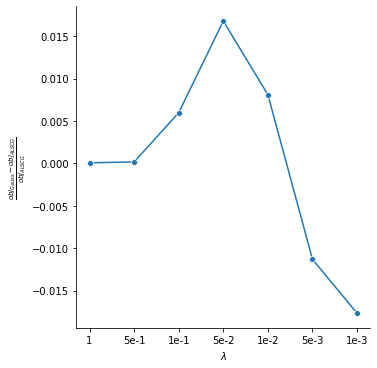

In [14]:
g = sns.relplot(x="lambda", y="rel_diff", kind="line", marker='o', data=data)
g.ax.set(xlabel=r'$\lambda$', ylabel=r"$\frac{obj_{Gauss} - obj_{ALSCG}}{obj_{ALSCG}}$")
g.savefig("fig/fig7-obj.png")